In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
dados = pd.read_csv('populacao_brasileira.csv')

In [ ]:
dados

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...,...
995,995,AC,22,Médio,Básico,2852.40,F
996,996,PE,40,Fundamental,Básico,2533.96,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,998,RS,61,Fundamental,Avançado,3513.60,F


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [ ]:
fluentes_ingles = dados[dados['nível de proficiência em inglês'] == 'Avançado'].shape[0]

total_pessoas = dados.shape[0]

prob_complementar = 1 - (fluentes_ingles / total_pessoas)
prob_complementar

0.656

2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
renda_superior_5mil = dados[(dados['estado'] == 'AL' ) | (dados['estado'] == 'PA') & (dados['renda'] > 5000)].shape[0]

total_alagoas_para = dados[(dados['estado'] == 'AL' ) | (dados['estado'] == 'PA')].shape[0]

prob_renda_5mil = renda_superior_5mil / total_alagoas_para
prob_renda_5mil

0.5443037974683544

3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
superior_amazonas = dados[(dados['estado'] == 'AM') & (dados['escolaridade'] == 'Superior')].shape[0]

total_amazonas = dados[dados['estado'] == 'AM'].shape[0]

prob_superior_amazonas = superior_amazonas / total_amazonas
prob_superior_amazonas

0.23684210526315788

4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?


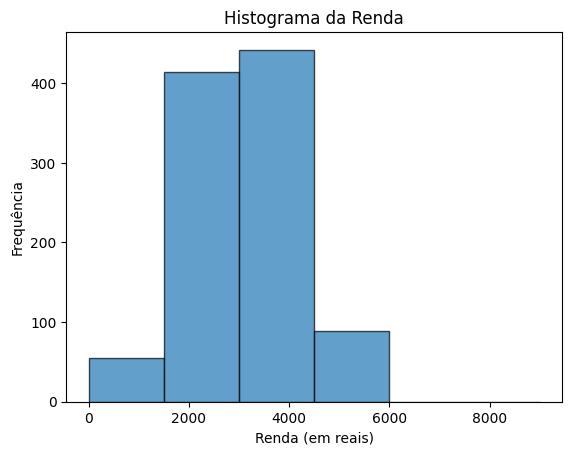

In [ ]:
# Definindo os intervalos para o histograma
intervalos = [0, 1500, 3000, 4500, 6000, 7500, 9000]

# Criando o histograma da renda
plt.hist(dados['renda'], bins=intervalos, edgecolor='black', alpha=0.7)
plt.title('Histograma da Renda')
plt.xlabel('Renda (em reais)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Continuando a partir do código anterior...

# Calculando a densidade de probabilidade
densidade_probabilidade = [0] * (len(intervalos) - 1)
total_pessoas = len(dados)

for i in range(len(intervalos) - 1):
    renda_intervalo = dados[(dados['renda'] >= intervalos[i]) & (dados['renda'] < intervalos[i + 1])].shape[0]
    densidade_probabilidade[i] = renda_intervalo / total_pessoas

# Imprimindo a função densidade de probabilidade
for i in range(len(intervalos) - 1):
    print(f"Intervalo de renda: {intervalos[i]} - {intervalos[i+1]} reais, Densidade de probabilidade: {densidade_probabilidade[i]}")

Intervalo de renda: 0 - 1500 reais, Densidade de probabilidade: 0.055
Intervalo de renda: 1500 - 3000 reais, Densidade de probabilidade: 0.414
Intervalo de renda: 3000 - 4500 reais, Densidade de probabilidade: 0.442
Intervalo de renda: 4500 - 6000 reais, Densidade de probabilidade: 0.089
Intervalo de renda: 6000 - 7500 reais, Densidade de probabilidade: 0.0
Intervalo de renda: 7500 - 9000 reais, Densidade de probabilidade: 0.0


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

Média da renda: 3082.5371800000003
Variância da renda: 992163.0719394477


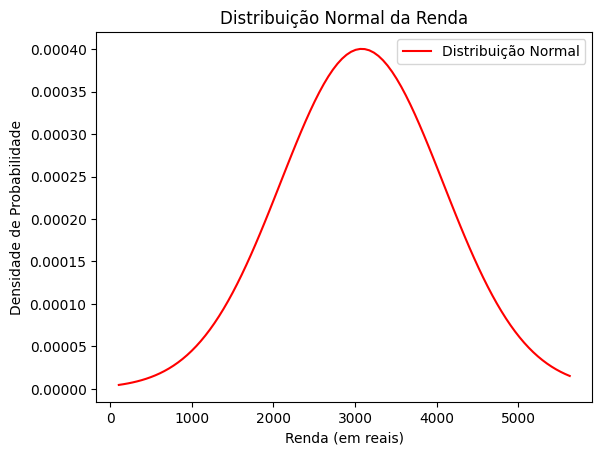

In [ ]:
# Calculando média e variância da renda
media_renda = np.mean(dados['renda'])
variancia_renda = np.var(dados['renda'])

print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

# Criando distribuição normal
x = np.linspace(min(dados['renda']), max(dados['renda']), 100)
pdf = norm.pdf(x, media_renda, np.sqrt(variancia_renda))

# Plotando distribuição normal
plt.plot(x, pdf, label='Distribuição Normal', color='r')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (em reais)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [ ]:
# Probabilidade de encontrar pessoas com pós-graduação na amostra
prob_pos_graduacao_amostra = dados[dados['escolaridade'] == 'Pós-graduação'].shape[0] / total_pessoas

# Tamanho da população brasileira
populacao_brasileira = 1000000

# Calculando a probabilidade na população brasileira
prob_pos_graduacao_brasil = prob_pos_graduacao_amostra * (populacao_brasileira / total_pessoas)

print("Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma população de 1 milhão de habitantes:", prob_pos_graduacao_brasil)

Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma população de 1 milhão de habitantes: 253.0


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
# Calculando a função de densidade acumulada discreta para cada nível de escolaridade
escolaridades = dados['escolaridade'].unique()

for escolaridade in escolaridades:
    pessoas_escolaridade = dados[dados['escolaridade'] == escolaridade].shape[0]
    densidade_acumulada = pessoas_escolaridade / total_pessoas
    print(f"Densidade acumulada discreta para {escolaridade}: {densidade_acumulada}")

Densidade acumulada discreta para Fundamental: 0.266
Densidade acumulada discreta para Superior: 0.243
Densidade acumulada discreta para Médio: 0.238
Densidade acumulada discreta para Pós-graduação: 0.253


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
# Proporção de pessoas com nível de inglês intermediário na amostra
prop_ingles_intermediario_amostra = dados[dados['nível de proficiência em inglês'] == 'Intermediário'].shape[0] / total_pessoas

# Número de pessoas na amostra
n = total_pessoas

# Margem de erro com nível de confiança de 95%
margem_erro = 1.96 * np.sqrt((prop_ingles_intermediario_amostra * (1 - prop_ingles_intermediario_amostra)) / n)

print("Margem de erro amostral da proporção populacional para pessoas com nível de inglês intermediário:", margem_erro)

Margem de erro amostral da proporção populacional para pessoas com nível de inglês intermediário: 0.029121603225097343


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
# Definindo a média e o desvio padrão
media_renda = np.mean(dados['renda'])
desvio_padrao_renda = np.std(dados['renda'])

# Calculando a probabilidade usando uma distribuição normal
prob_60_pessoas = 1 - norm.cdf(media_renda + 1000, media_renda, desvio_padrao_renda)

print("Probabilidade de encontrar 60 pessoas com renda mil reais superior à média:", prob_60_pessoas)

Probabilidade de encontrar 60 pessoas com renda mil reais superior à média: 0.1577033704394677


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
# Contando o número de pessoas do Sudeste, homens, com ensino fundamental e renda maior que 2 mil reais
condicoes = dados[(dados['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) & (dados['sexo'] == 'M') & (dados['escolaridade'] == 'Fundamental') & (dados['renda'] > 2000)].shape[0]

# Total de pessoas com as condições fornecidas
total_condicoes = dados.shape[0]

# Calculando a probabilidade
prob_condicoes = condicoes / total_condicoes

print("Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês:", prob_condicoes)

Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês: 0.019
